In [1]:
import numpy as np
import pandas as pd
from tkinter import filedialog as fd
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
IPythonConsole.ipython_useSVG=True

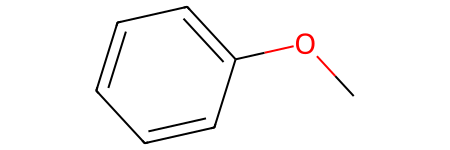

In [2]:
m = Chem.MolFromSmiles("c1ccccc1OC")
m

In [3]:
m = Chem.MolFromSmiles("c1ccccc1O(C)C")

[11:42:36] Explicit valence for atom # 6 O, 3, is greater than permitted


In [4]:
m is None

True

In [5]:
from tkinter import filedialog as fd

# molecular descriptors for ALDH1 inhibitors:

-   molecular mass
-   nr carbon atoms
-   nr hydrogen atoms  
-   nr of bonds
-   nr of branches
-   nr double bindings
-   nr triple bindings
-   cyclic structures
-   Aromaticity (indicated by lower letters)
    -   aromatic nitrogen
-   (tetra hedral) chirality
- nr of rings (e.g. cubane)


### rdkit has automatic implemented descriptors and Fingerprints:


Open the tested samples:

In [6]:
filename = fd.askopenfilename()
AHDL1Inhibitors = pd.read_csv(filename ,header = None)

2023-06-14 11:42:37.396 python[1584:31396] +[CATransaction synchronize] called within transaction
2023-06-14 11:42:37.519 python[1584:31396] +[CATransaction synchronize] called within transaction


In [7]:
AHDL1Inhibitors[0][1]

'COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1'

In [8]:
print(len(Descriptors._descList))
print(Descriptors._descList[:5])

209
[('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x165c96980>), ('MaxEStateIndex', <function MaxEStateIndex at 0x165c96840>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x165c96a20>), ('MinEStateIndex', <function MinEStateIndex at 0x165c968e0>), ('qed', <function qed at 0x165cc96c0>)]


In [9]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

In [10]:
AHDL1Inhibitors[0][1]

'COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1'

AHDL1Inhibitors[0][1]


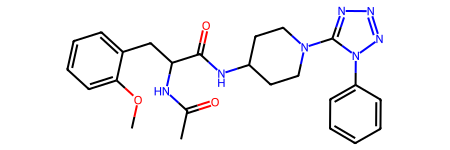

In [11]:
molecule = Chem.MolFromSmiles(AHDL1Inhibitors[0][1])
molecule

In [12]:
getMolDescriptors(molecule)

{'MaxAbsEStateIndex': 13.083531447323905,
 'MaxEStateIndex': 13.083531447323905,
 'MinAbsEStateIndex': 0.001173180692030762,
 'MinEStateIndex': -0.6831399723499987,
 'qed': 0.5203647862499531,
 'MolWt': 463.54200000000026,
 'HeavyAtomMolWt': 434.3100000000002,
 'ExactMolWt': 463.2331877880001,
 'NumValenceElectrons': 178,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.2498683330982345,
 'MinPartialCharge': -0.4964765338733181,
 'MaxAbsPartialCharge': 0.4964765338733181,
 'MinAbsPartialCharge': 0.2498683330982345,
 'FpDensityMorgan1': 1.088235294117647,
 'FpDensityMorgan2': 1.7941176470588236,
 'FpDensityMorgan3': 2.5,
 'BCUT2D_MWHI': 16.465857064612035,
 'BCUT2D_MWLOW': 10.012387123815586,
 'BCUT2D_CHGHI': 2.277377408380586,
 'BCUT2D_CHGLO': -2.329164203915786,
 'BCUT2D_LOGPHI': 2.2133733533282376,
 'BCUT2D_LOGPLOW': -2.5243684910679804,
 'BCUT2D_MRHI': 5.869761700770313,
 'BCUT2D_MRLOW': -0.12818123363075157,
 'AvgIpc': 3.3456496356368177,
 'BalabanJ': 1.3746473471677294,
 'BertzCT

In [13]:
mol_descriptor_calculator = MolecularDescriptorCalculator()

TypeError: MolecularDescriptorCalculator.__init__() missing 1 required positional argument: 'simpleList'

In [ ]:
suppl = Chem.SmilesMolSupplier(filename)
mols = [m for m in suppl]
# len(mols)

[16:13:20] SMILES Parse Error: syntax error while parsing: "COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1","1"
[16:13:20] SMILES Parse Error: Failed parsing SMILES '"COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1","1"' for input: '"COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1","1"'
[16:13:20] ERROR: Smiles parse error on line 1
[16:13:20] ERROR: Cannot create molecule from : '"COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccccc2)CC1","1"'
[16:13:20] SMILES Parse Error: syntax error while parsing: "O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1","1"
[16:13:20] SMILES Parse Error: Failed parsing SMILES '"O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1","1"' for input: '"O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1","1"'
[16:13:20] ERROR: Smiles parse error on line 2
[16:13:20] ERROR: Cannot create molecule from : '"O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1","1"'
[16:13:20] SMILES Parse Error: syntax error while parsing: "Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C(C)C)c(O)nc12","1"
[16:13:

Fingerprints

In [ ]:
def rdkit_numpy_convert(fp):
    output = []
    for f in fp:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(f, arr)
        output.append(arr)
    return np.asarray(output)

In [ ]:
fingerp = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mols]
x = rdkit_numpy_convert(fingerp)
x.shape

## From RDKit Fingerprint tutorials

In [ ]:
fpgen = AllChem.GetRDKitFPGenerator()
fps = [fpgen.GetFingerprint(x) for x in mols]


In [ ]:
fpgen = AllChem.GetMorganGenerator(radius=2)
fp1 = fpgen.GetSparseCountFingerprint(mols[1])
# check imbalance dataset:
sum(AHDL1Inhibitors[1][1:].astype(int))/len(AHDL1Inhibitors[1][1:])
# mild imbalance